In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_trial_df = pd.merge(mouse_drug_df, clinical_trial_df,
                            how='right', on='Mouse ID')


# Display the data table for preview
combined_trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = combined_trial_df.groupby(["Drug", "Timepoint"])
tumor_volume_average = tumor_response["Tumor Volume (mm3)"].mean()
#Convert to DataFrame
tumor_response_df =  tumor_volume_average.reset_index()
#tumor_response_df =  tumor_volume_average.to_frame().reset_index()
#Preview DataFrame
tumor_response_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_tv = tumor_response['Tumor Volume (mm3)'].sem().reset_index()
# Preview DataFrame
standard_error_tv.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_tumor_data_mean_pivot = tumor_response_df.pivot(index="Timepoint", columns="Drug",
                                          values="Tumor Volume (mm3)")
# Preview that Reformatting worked
pivot_tumor_data_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
tumor_vols_pivot_mean1 = tumor_response_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_vols_pivot_mean1

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
# error pivot
pivot_tumor_data_sem_pivot = standard_error_tv.pivot(index="Timepoint", columns="Drug",
                                          values="Tumor Volume (mm3)")
# Preview that Reformatting worked
pivot_tumor_data_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [7]:
pivot_tumor_data_mean_pivot.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

<function matplotlib.pyplot.show(*args, **kw)>

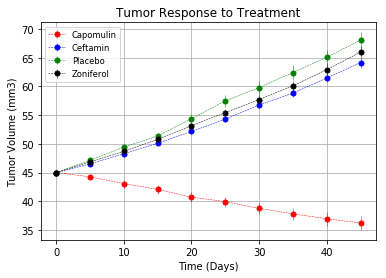

In [8]:
# Generate the Plot (with Error Bars)
plt.errorbar(pivot_tumor_data_mean_pivot.index, pivot_tumor_data_mean_pivot["Capomulin"], yerr=pivot_tumor_data_sem_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_tumor_data_mean_pivot.index, pivot_tumor_data_mean_pivot["Ceftamin"], yerr=pivot_tumor_data_sem_pivot["Ceftamin"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_tumor_data_mean_pivot.index, pivot_tumor_data_mean_pivot["Placebo"], yerr=pivot_tumor_data_sem_pivot["Placebo"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_tumor_data_mean_pivot.index, pivot_tumor_data_mean_pivot["Zoniferol"], yerr=pivot_tumor_data_sem_pivot["Zoniferol"], color="k", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)


plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)


plt.savefig("Tumor Response")

plt.show
# Save the Figure



## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metastatic_mean = combined_trial_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
metastatic_mean_df = pd.DataFrame(metastatic_mean)
# Preview DataFrame
metastatic_mean_df.tail()

Metastatic Sites
Drug      Timepoint                  
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_se = combined_trial_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
metastatic_se_df = pd.DataFrame(metastatic_se)
# Preview DataFrame
metastatic_se_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean_df = metastatic_mean_df.reset_index()
metastatic_mean_pivot = metastatic_mean_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

metastatic_se_df = metastatic_se_df.reset_index()
metastatic_se_pivot = metastatic_se_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
#tumor_vols_pivot_mean.head()
# Preview that Reformatting worked


<function matplotlib.pyplot.show(*args, **kw)>

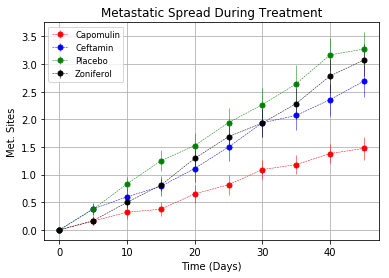

In [12]:
# Generate the Plot (with Error Bars)
plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Capomulin"], yerr=metastatic_se_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Ceftamin"], yerr=metastatic_se_pivot["Ceftamin"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Placebo"], yerr=metastatic_se_pivot["Placebo"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Zoniferol"], yerr=metastatic_se_pivot["Zoniferol"], color="k", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Metastatic")

# Show the Figure
plt.show

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate = combined_trial_df.groupby(['Drug','Timepoint']).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_rate_df = pd.DataFrame({"Mouse Count": survival_rate})
# Preview DataFrame
#survival_rate_df.head
survival_rate_df.head().reset_index()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_df = survival_rate_df.reset_index()
survival_rate_df_pivot = survival_rate_df.pivot(index='Timepoint', columns='Drug',
                                          values='Mouse Count')
# Preview the Data Frame
survival_rate_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


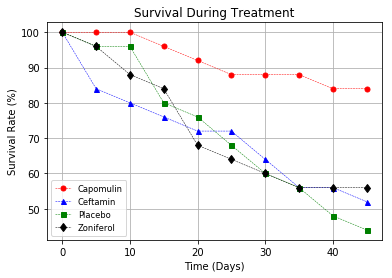

In [15]:
# Generate the Plot (Accounting for percentages)

plt.plot(100 * survival_rate_df_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_rate_df_pivot["Ceftamin"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_rate_df_pivot["Placebo"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_rate_df_pivot["Zoniferol"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")


plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("survival rate")
# Show the Figure
plt.show()

## Summary Bar Graph

In [25]:
# Calculate the percent changes for each drug
percent_change_mean =  100 * (pivot_tumor_data_mean_pivot.iloc[-1] - pivot_tumor_data_mean_pivot.iloc[0]) / pivot_tumor_data_mean_pivot.iloc[0]
percent_change_sem =  100 * (pivot_tumor_data_sem_pivot.iloc[-1] - pivot_tumor_data_sem_pivot.iloc[0]) / pivot_tumor_data_sem_pivot.iloc[0]
#print volume change info to confirm



In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
